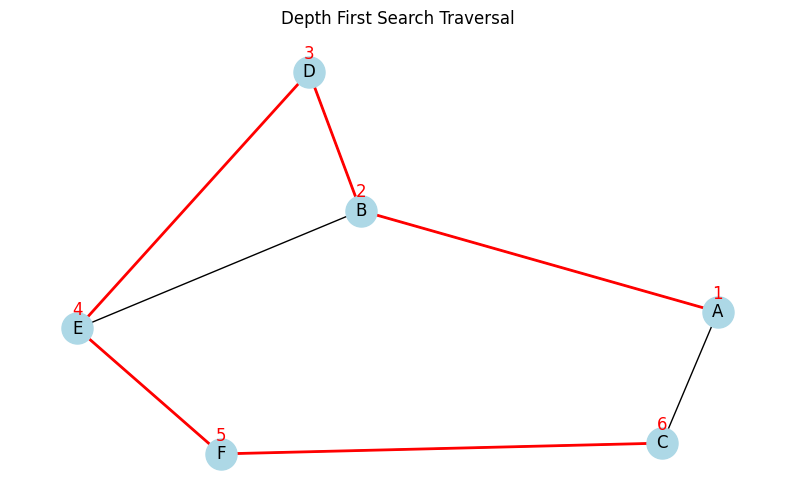

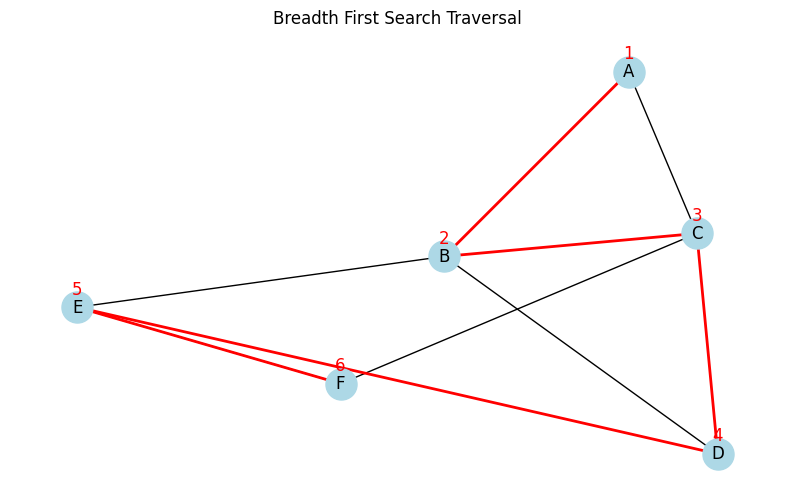

DFS Path: A -> B -> D -> E -> F -> C
BFS Path: A -> B -> C -> D -> E -> F


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create a graph
G = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('E', 'F')
]
G.add_edges_from(edges)

def plot_graph_traversal(G, path, title):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    
    # Highlight the path
    path_edges = list(zip(path[:-1], path[1:]))
    
    # Draw path edges with arrows
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, arrows=True)
    
    # Add numbers to show order of traversal
    pos_attrs = {}
    for node, coords in pos.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
    
    path_labels = {node: str(i+1) for i, node in enumerate(path)}
    nx.draw_networkx_labels(G, pos_attrs, path_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

# DFS implementation with path tracking
def dfs_with_path(graph, start):
    path = []
    visited = set()
    
    def dfs_recursive(vertex):
        visited.add(vertex)
        path.append(vertex)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                dfs_recursive(neighbor)
    
    dfs_recursive(start)
    return path

# BFS implementation with path tracking
def bfs_with_path(graph, start):
    path = []
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        vertex = queue.popleft()
        path.append(vertex)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    return path

# Create the graph dictionary
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Get paths
dfs_path = dfs_with_path(graph, 'A')
bfs_path = bfs_with_path(graph, 'A')

# Plot DFS traversal
plot_graph_traversal(G, dfs_path, 'Depth First Search Traversal')

# Plot BFS traversal
plot_graph_traversal(G, bfs_path, 'Breadth First Search Traversal')

print("DFS Path:", ' -> '.join(dfs_path))
print("BFS Path:", ' -> '.join(bfs_path))